<a href="https://colab.research.google.com/github/Rogerio-mack/VLF/blob/main/goes_hek_m25_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Flare times on a GOES XRS plot

How to plot flare times as provided by the HEK on a GOES XRS plot.


In [ ]:
!pip install sunpy[all]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.2/962.2 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.4/95.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.2/86.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.3/350.3 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.2/195.2 kB 13

In [ ]:
import matplotlib.pyplot as plt

from sunpy.net import Fido
from sunpy.net import attrs as a
from sunpy.time import parse_time
from sunpy.timeseries import TimeSeries

Let's grab GOES XRS data for a particular time of interest and the HEK flare
data for this time from the NOAA Space Weather Prediction Center (SWPC).
Here we are searching for data from the GOES-15 satellite and for the 1-min average time-sampled data.



In [ ]:
tr = a.Time('2024-10-01 00:00', '2024-11-01 00:00')
results = Fido.search(tr, a.Instrument.xrs & a.goes.SatelliteNumber(16) & a.Resolution("avg1m") | a.hek.FL & (a.hek.FRM.Name == 'SWPC'))

Then download the XRS data and load it into a TimeSeries.



In [ ]:
files = Fido.fetch(results)
goes = TimeSeries(files)

Files Downloaded:   0%|          | 0/32 [00:00<?, ?file/s]

sci_xrsf-l2-avg1m_g16_d20241006_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241007_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241009_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241008_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241010_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241011_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241012_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241013_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241014_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241015_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241016_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241017_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241018_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241019_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241020_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241021_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241022_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241023_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241024_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241025_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241026_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241027_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241028_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241029_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241030_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241031_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241101_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

Next let's retrieve `~sunpy.net.hek.HEKTable` from the Fido result
and then load the first row from HEK results into ``flares_hek``.



In [ ]:
hek_results = results['hek']
flares_hek = hek_results[0]

In [ ]:
len(hek_results), len(goes)

(280, 32)

Lets plot everything together.



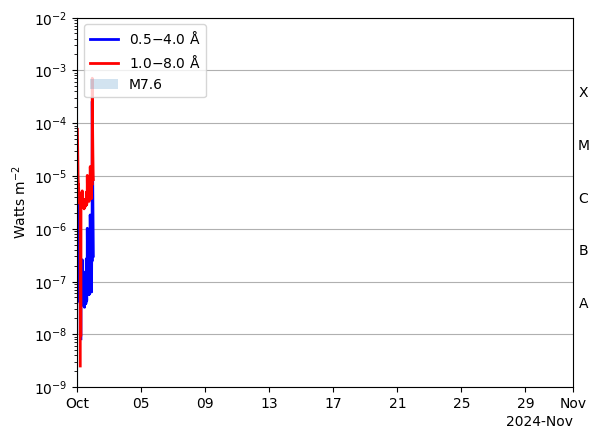

In [ ]:
fig, ax = plt.subplots()
goes[0].plot(axes=ax)
ax.axvline(parse_time(flares_hek['event_peaktime']).datetime)
ax.axvspan(
    parse_time(flares_hek['event_starttime']).datetime,
    parse_time(flares_hek['event_endtime']).datetime,
    alpha=0.2, label=flares_hek['fl_goescls']
)
ax.legend(loc=2)
ax.set_yscale('log')
ax.set_xlim(tr.start.to_datetime(), tr.end.to_datetime())

plt.show()

In [ ]:
import numpy as np

np.array([10**-exp for exp in range(3, 11)])

array([1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08, 1.e-09, 1.e-10])

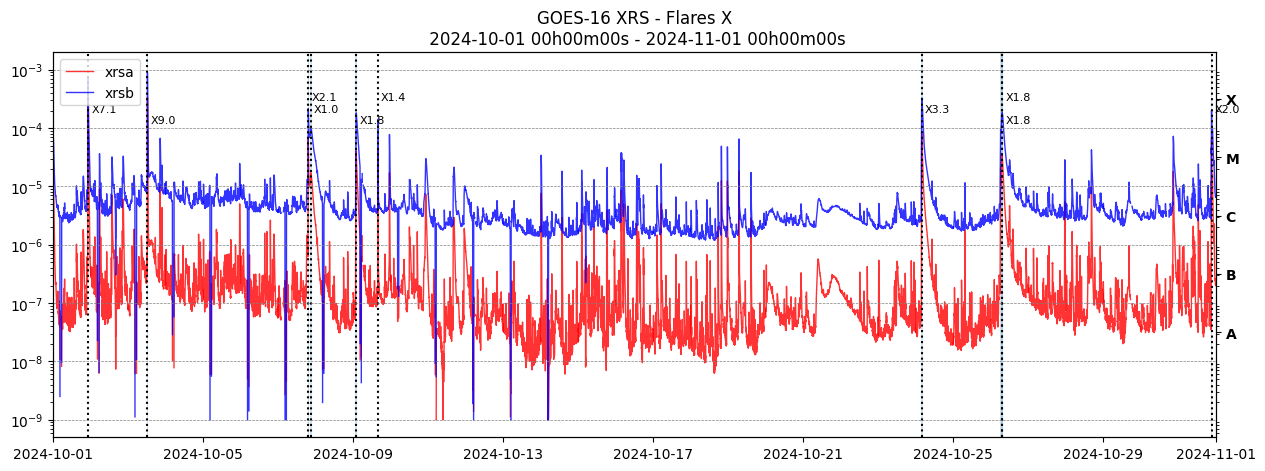

In [ ]:
from datetime import timedelta

flare_type = 'X'
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(goes[0].to_dataframe()['xrsa'], lw=1, color='r',label='xrsa',alpha=0.8)
ax.plot(goes[0].to_dataframe()['xrsb'], lw=1, color='b',label='xrsb',alpha=0.8)

for i in range(1,len(goes)):
  # goes[i].plot(axes=ax)
  ax.plot(goes[i].to_dataframe()['xrsa'], lw=1, color='r',alpha=0.8)
  ax.plot(goes[i].to_dataframe()['xrsb'], lw=1, color='b',alpha=0.8)

nr_flares = 1
for i in range(len(hek_results)):
  flares_hek = hek_results[i]
  if str(flares_hek['fl_goescls'])[0] == str(flare_type):
    ax.axvline(parse_time(flares_hek['event_peaktime']).datetime,linestyle=':',color='k')
    ax.axvspan(
        parse_time(flares_hek['event_starttime']).datetime,
        parse_time(flares_hek['event_endtime']).datetime,
        alpha=0.2,) # label=flares_hek['fl_goescls'])
    ax.text(parse_time(flares_hek['event_peaktime']).datetime + timedelta(hours=2),15**-(3+(nr_flares%3)/6),str(flares_hek['fl_goescls']),fontsize=8)
    nr_flares = nr_flares+1

for exp in range(3, 10):
  ax.axhline(10**-exp, lw=0.5, color='grey', linestyle='dashed')

ax.legend(loc=2)
ax.set_yscale('log')
ax.set_xlim(tr.start.to_datetime(), tr.end.to_datetime())

ax2 = ax.twinx()
ax2.set_yscale('log')
ax2.set_yticks(np.array([10**-(exp+0.5) for exp in range(3,8)]))
ax2.set_yticklabels(['X','M','C','B','A'],fontweight='bold')
ax2.set_ylim(ax.get_ylim())

ax.set_title(f"GOES-16 XRS - Flares {flare_type}\n {tr.start.to_datetime().strftime('%Y-%m-%d %Hh%Mm%Ss')} - {tr.end.to_datetime().strftime('%Y-%m-%d %Hh%Mm%Ss')}")

plt.show()

In [ ]:
tr.start.to_datetime().strftime('%Y-%m-%d-%H-%M'), tr.end.to_datetime().strftime('%Y-%m-%d-%H-%M')

('2024-10-01-00-00', '2024-11-01-00-00')

<sunpy.timeseries.sources.goes.XRSTimeSeries object at 0x7a93c68eb6d0>
SunPy TimeSeries
----------------
Observatory:			GOES-16
Instrument:			<a href=https://www.swpc.noaa.gov/products/goes-x-ray-flux target="_blank">Unknown</a>
Channel(s):			xrsa<br>xrsb<br>xrsa_quality<br>xrsb_quality
Start Date:			2024-10-01 00:00:00
End Date:			2024-10-01 23:59:00
Center Date:			2024-10-01 11:59:30
Resolution:			59.958 s
Samples per Channel:		1440
Data Range(s):		xrsa           2.58E-04<br>xrsb           7.08E-04<br>xrsa_quality   1.60E+01<br>xrsb_quality   1.60E+01
Units:			dimensionless<br>W / m2
                             xrsa      xrsb  xrsa_quality  xrsb_quality
2024-10-01 00:00:00  1.547825e-05  0.000076             0             0
2024-10-01 00:01:00  1.507135e-05  0.000075             0             0
2024-10-01 00:02:00  1.492971e-05  0.000074             0             0
2024-10-01 00:03:00  1.493554e-05  0.000073             0             0
2024-10-01 00:04:00  1.506077e-05  0.000072             0             0
...                           ...       ...           ...           ...
2024-10-01 23:55:00  3.340124e-07  0.000009             0             0
2024-10-01 23:56:00  3.216985e-07  0.000009             0             0
2024-10-01 23:57:00  3.148741e-07  0.000009             0             0
2024-10-01 23:58:00  3.097803e-07  0.000009             0             0
2024-10-01 23:59:00  3.025097e-07  0.000009             0             0

[1440 rows x 4 columns]
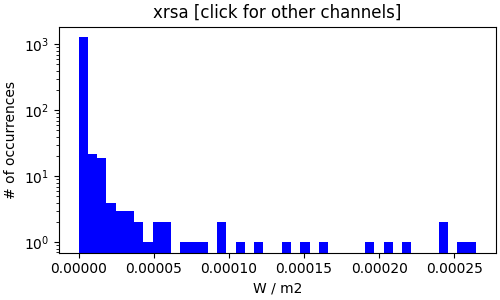
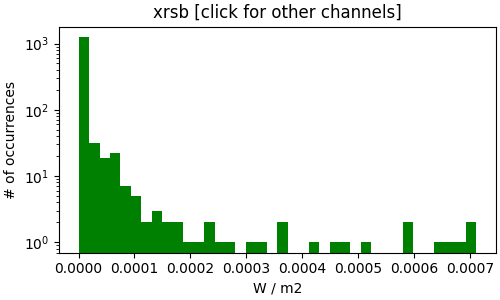
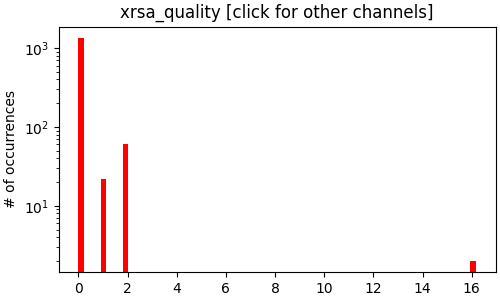
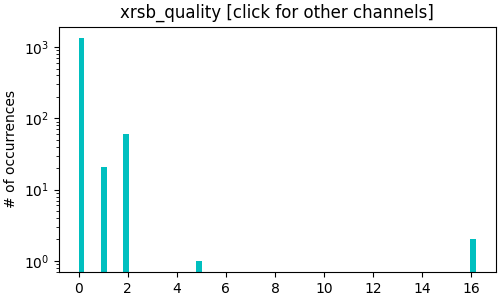
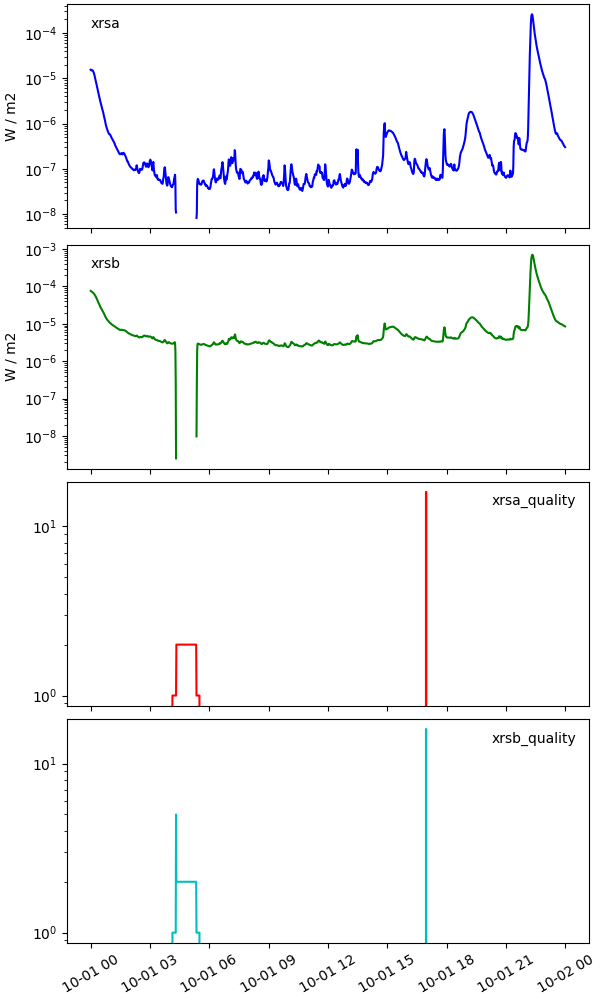
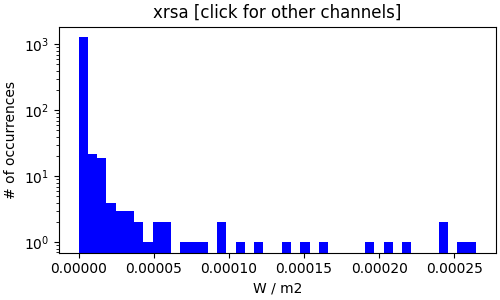

In [ ]:
goes[0]

In [ ]:
goes[0].to_dataframe()['xrsa']

,xrsa
2024-10-01 00:00:00,1.547825e-05
2024-10-01 00:01:00,1.507135e-05
2024-10-01 00:02:00,1.492971e-05
2024-10-01 00:03:00,1.493554e-05
2024-10-01 00:04:00,1.506077e-05
...,...
2024-10-01 23:55:00,3.340124e-07
2024-10-01 23:56:00,3.216985e-07
2024-10-01 23:57:00,3.148741e-07
2024-10-01 23:58:00,3.097803e-07


In [ ]:
dir(goes[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_data',
 '_netcdf_read_kw',
 '_parse_file',
 '_parse_hdus',
 '_parse_netcdf',
 '_peek_title',
 '_registry',
 '_repr_html_',
 '_sanitize_metadata',
 '_setup_axes_columns',
 '_setup_x_axis',
 '_source',
 '_text_summary',
 '_url',
 '_validate_data_for_plotting',
 'add_column',
 'columns',
 'concatenate',
 'data',
 'extract',
 'is_datasource_for',
 'meta',
 'observatory',
 'peek',
 'plot',
 'quantity',
 'quicklook',
 'remove_column',
 'shape',
 'sort_index',
 'source',
 'time',
 'time_range',
 'to_array',
 'to_dataframe',
 'to_table',
 'truncate',
 'units',
 'url']

In [ ]:
for key in hek_results[0].keys():
  print(key, hek_results[0][key])

gs_thumburl 
comment_count 0
hpc_bbox <SkyCoord (Helioprojective: obstime=['2024-10-01T13:22:00.000' '2024-10-01T13:22:00.000'
 '2024-10-01T13:22:00.000' '2024-10-01T13:22:00.000'
 '2024-10-01T13:22:00.000'], rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=['2024-10-01T13:22:00.000' '2024-10-01T13:22:00.000'
 '2024-10-01T13:22:00.000' '2024-10-01T13:22:00.000'
 '2024-10-01T13:22:00.000'], rsun=695700.0 km): (lon, lat, radius) in (deg, deg, AU)
    [(0., 6.68401371, 1.00107128), (0., 6.68401371, 1.00107128),
     (0., 6.68401371, 1.00107128), (0., 6.68401371, 1.00107128),
     (0., 6.68401371, 1.00107128)]>): (Tx, Ty) in arcsec
    [(-1.670846, -950.92128), ( 1.670846, -950.92128),
     ( 1.672819,  951.94908), (-1.672819,  951.94908),
     (-1.670846, -950.92128)]>
frm_humanflag false
hgc_coord <SkyCoord (HeliographicCarrington: obstime=2024-10-01T13:22:00.000, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2024-10-01T13:22:00.000, rsun=69

In [ ]:
str(hek_results[0]['fl_goescls'])

'C4.9'

In [ ]:
str(hek_results[0]['fl_goescls'])[0] == str('C')

True